In [1]:
import numpy as np
import EQTransformer as eqt
from EQTransformer.core.trainer import trainer
# np.array([1, 2, 3, 4, 5])
# dir(EQTransformer)
# print(eqt.__version__)
trainer(input_hdf5='updeANMO.hdf5', input_csv='training_PandS_updeANMO.csv', output_name='test_trainer_updeANMO', cnn_blocks=2, lstm_blocks=1, padding='same', activation='relu', drop_rate=0.2, label_type='gaussian', add_event_r=0.6, add_gap_r=0.2, shift_event_r=0.9, add_noise_r=0.5, mode='generator', train_valid_test_split=[0.60, 0.20, 0.20], batch_size=20, epochs=10, patience=2, gpuid=None, gpu_limit=None, input_dimention=(6000, 3))
# trainer(input_hdf5='/Users/jun/phasepick/EQTransformer/ModelsAndSampleData/100samples.hdf5',
#         input_csv='/Users/jun/phasepick/EQTransformer/ModelsAndSampleData/100samples.csv',
#         output_name='test_trainer',                
#         cnn_blocks=2,
#         lstm_blocks=1,
#         padding='same',
#         activation='relu',
#         drop_rate=0.2,
#         label_type='gaussian',
#         add_event_r=0.6,
#         add_gap_r=0.2,
#         shift_event_r=0.9,
#         add_noise_r=0.5, 
#         mode='generator',
#         train_valid_test_split=[0.60, 0.20, 0.20],
#         batch_size=20,
#         epochs=10, 
#         patience=2,
#         gpuid=None,
#         gpu_limit=None)


Using TensorFlow backend.
2023-07-27 00:51:19.531346: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-07-27 00:51:19.546311: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ffbce1dd680 executing computations on platform Host. Devices:
2023-07-27 00:51:19.546324: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


Learning rate:  0.001
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 6000, 3)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 6000, 8)      272         input[0][0]                      
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 3000, 8)      0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 3000, 16)     1168        max_pooling1d_1[0][0]            
______________________________________________________________________

KeyboardInterrupt: 

In [2]:
dir(eqt.picker)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

Loading the model ...
Loading is complete!
Testing ...
Writting results into: " test_tester_updeANMO_outputs "


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


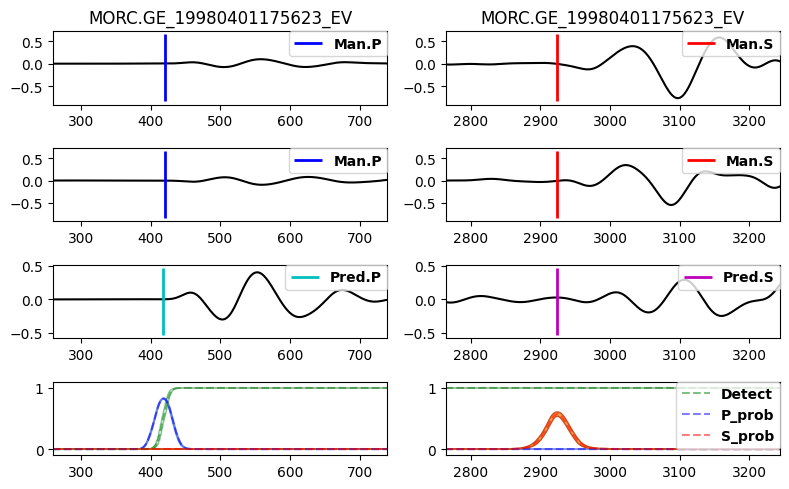

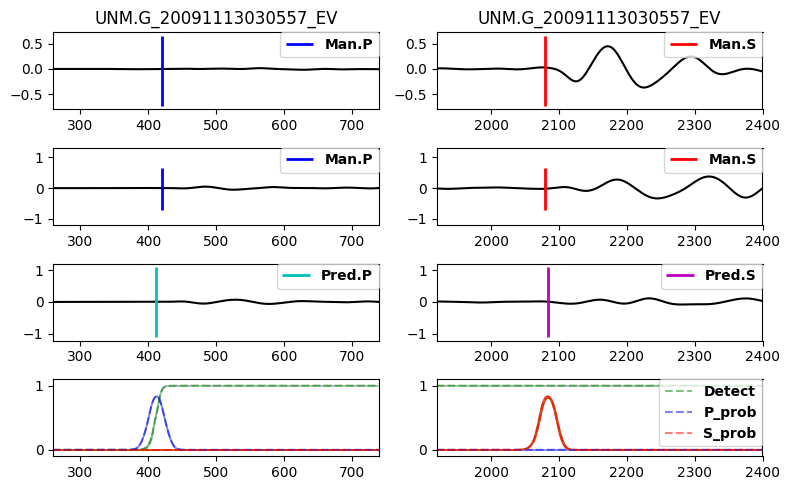

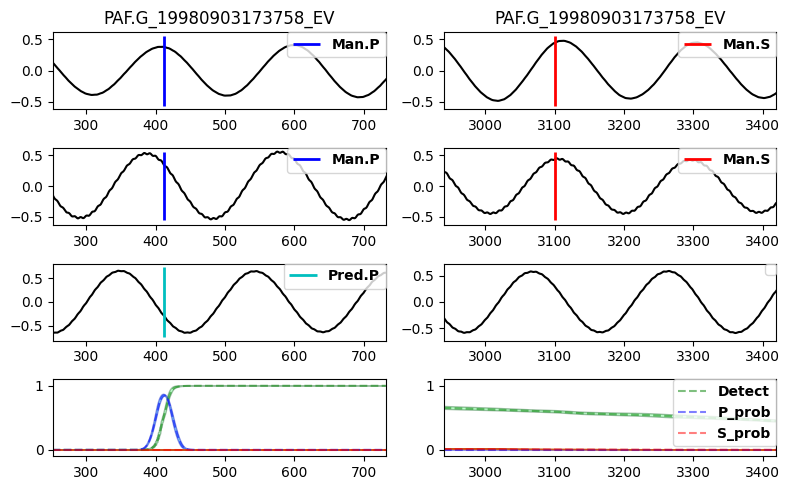

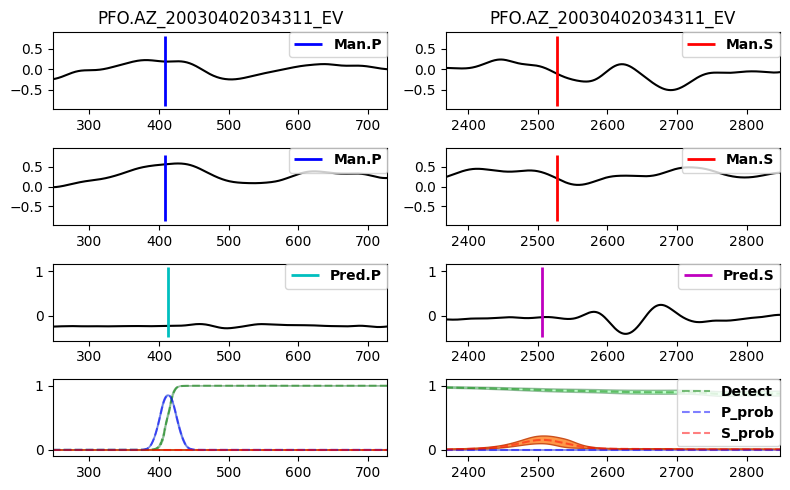

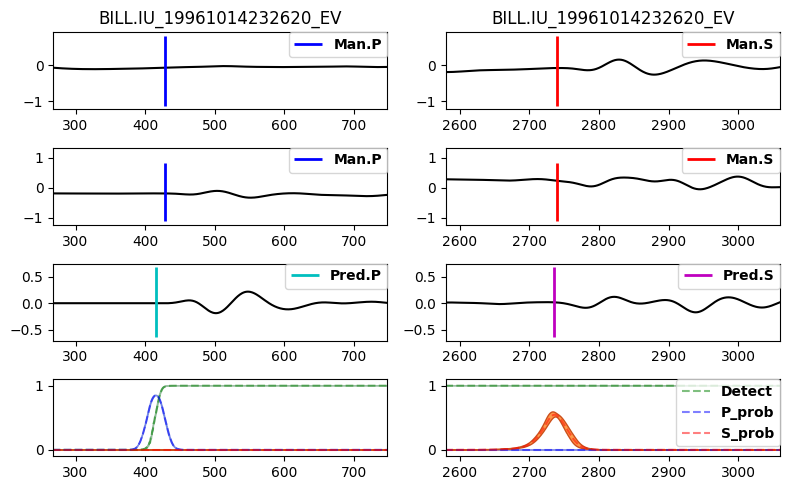

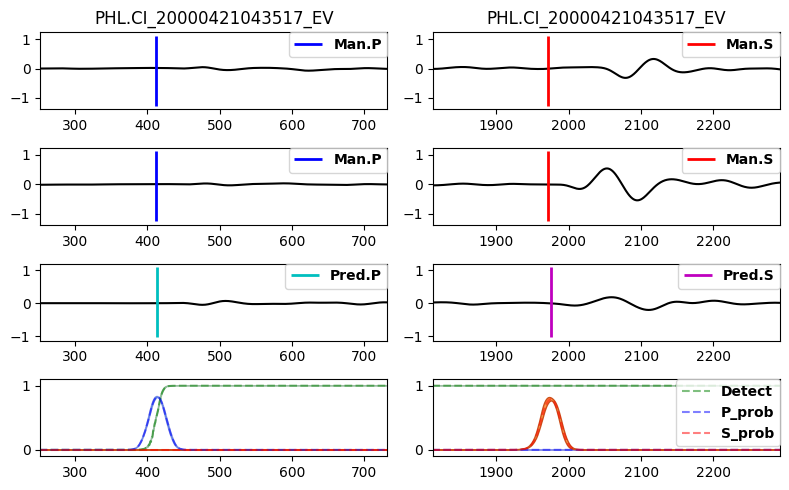

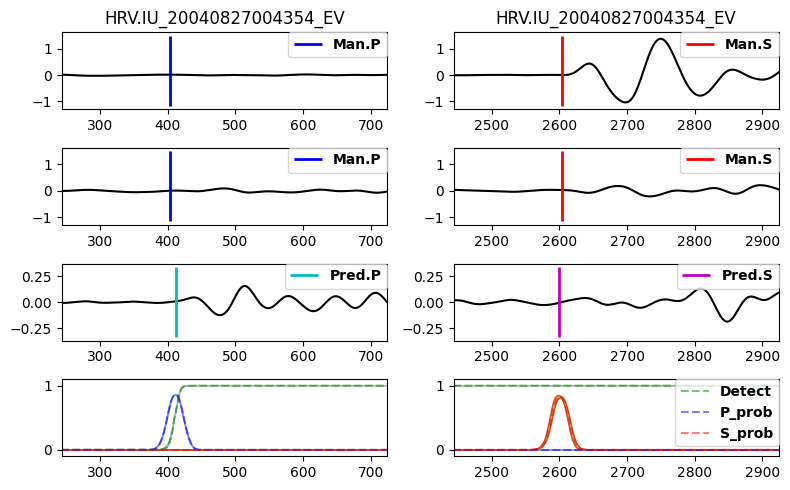

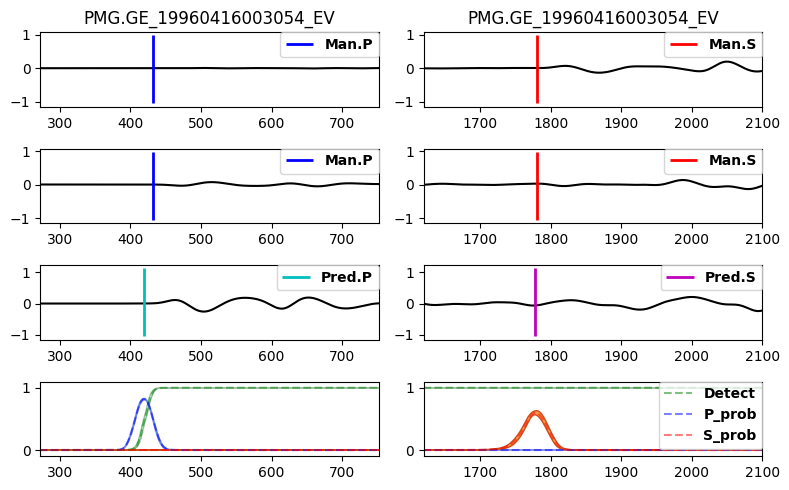

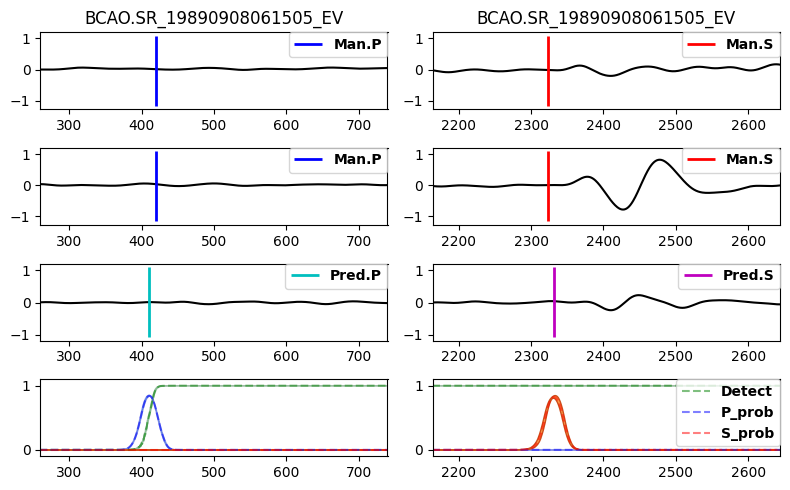

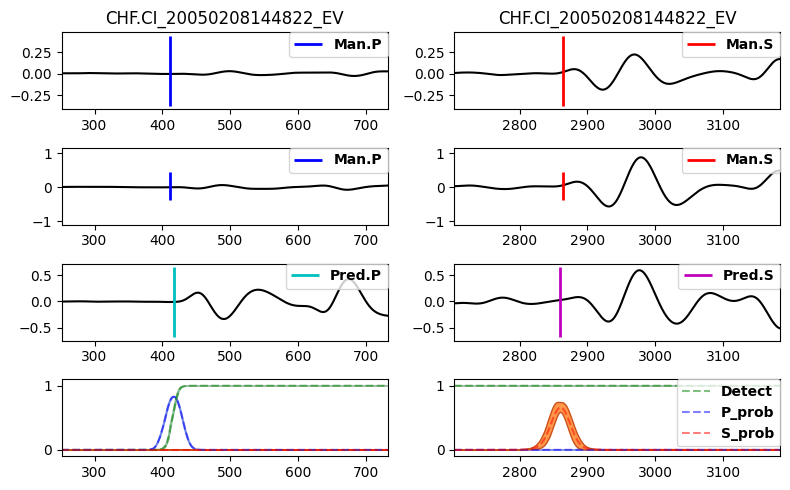

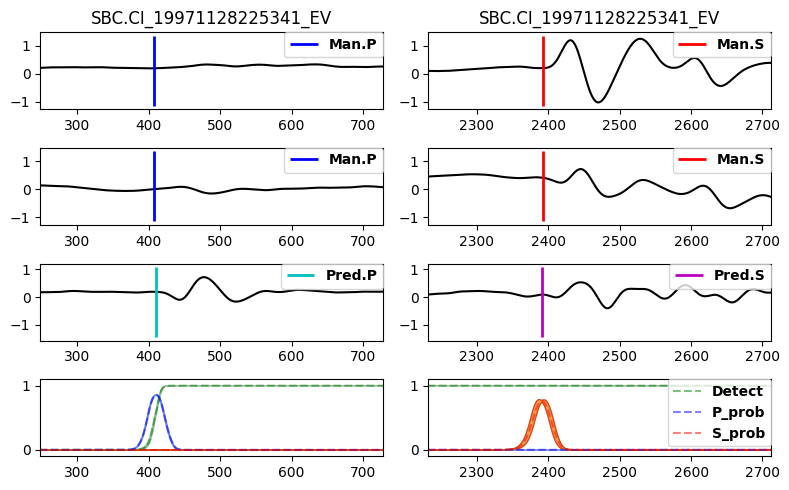

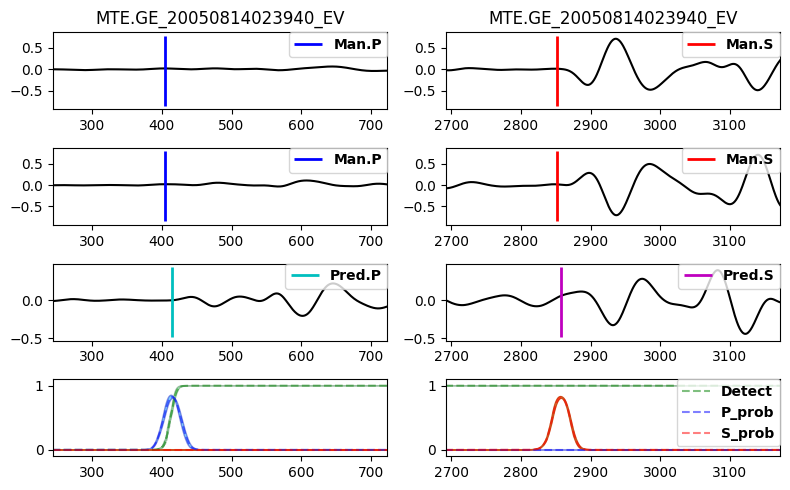

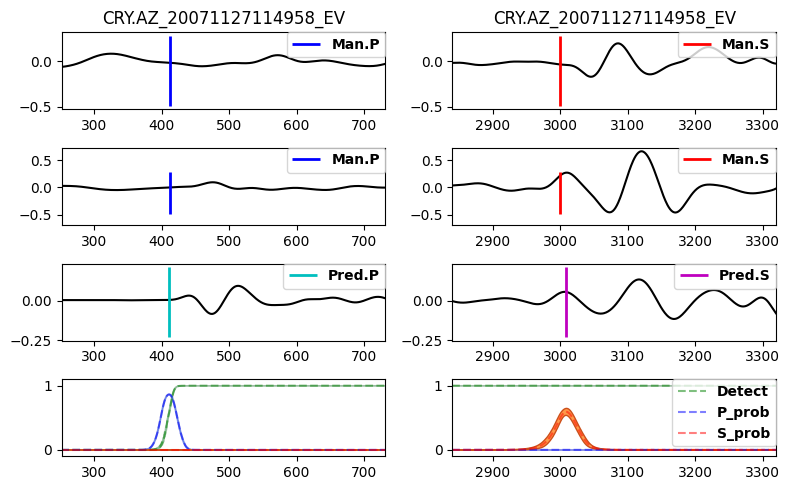

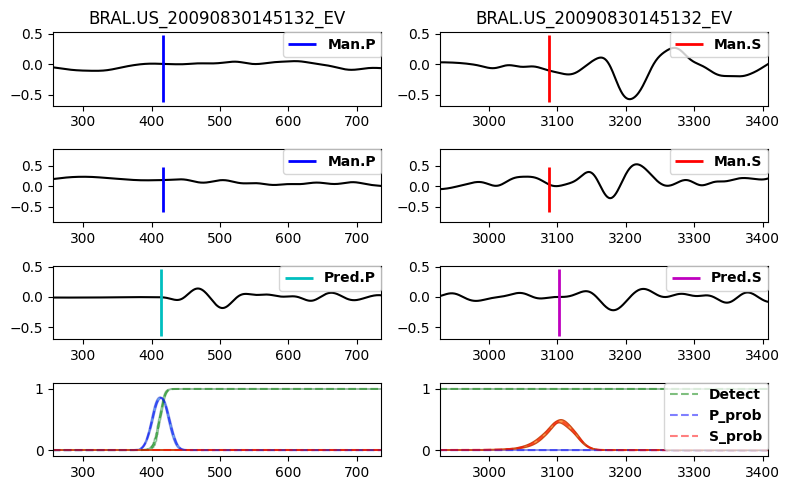

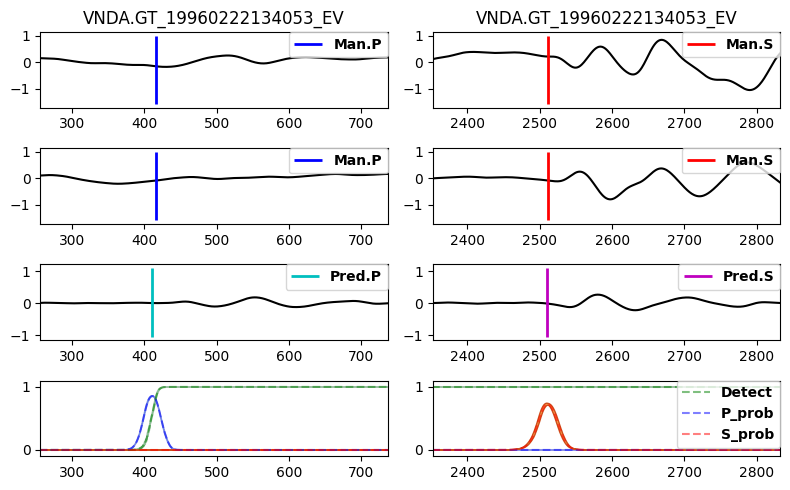

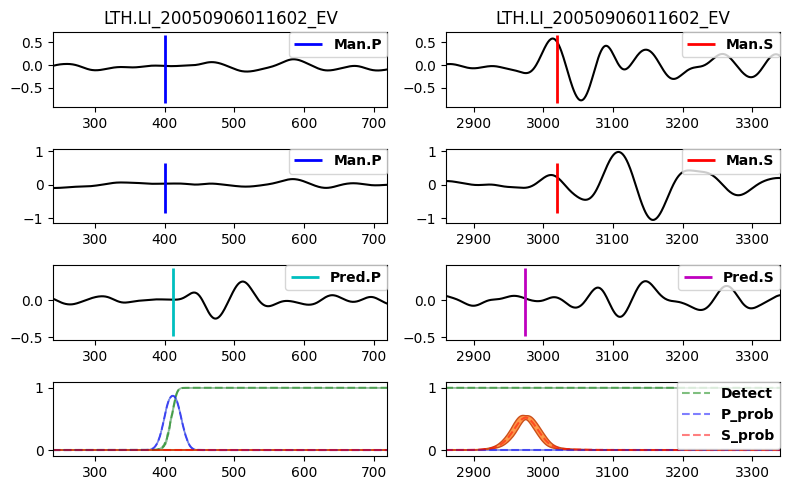

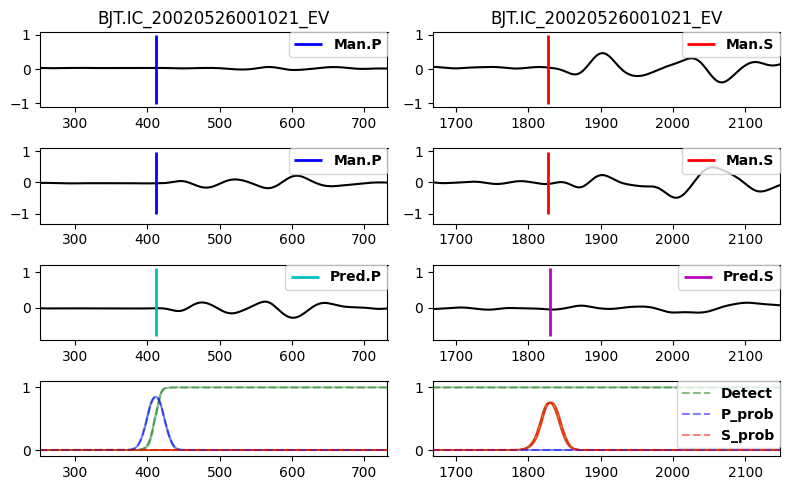

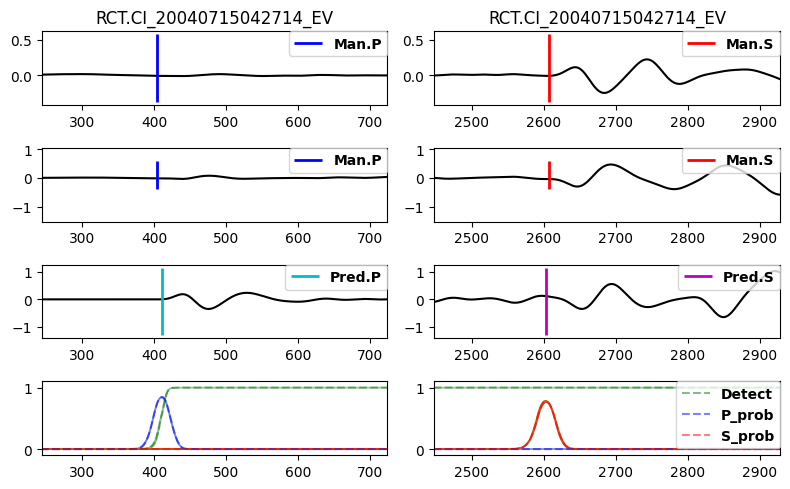

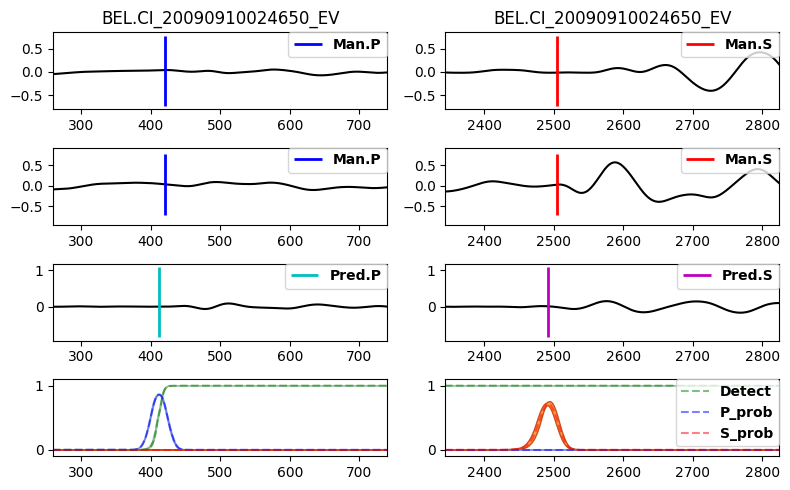

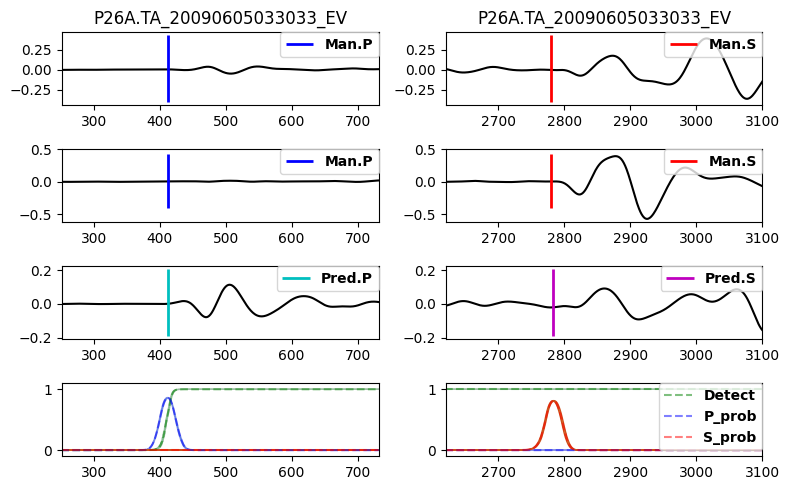

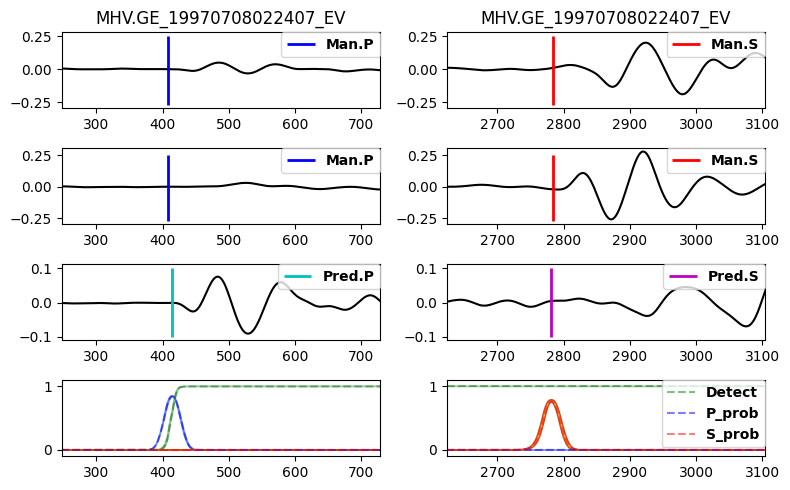

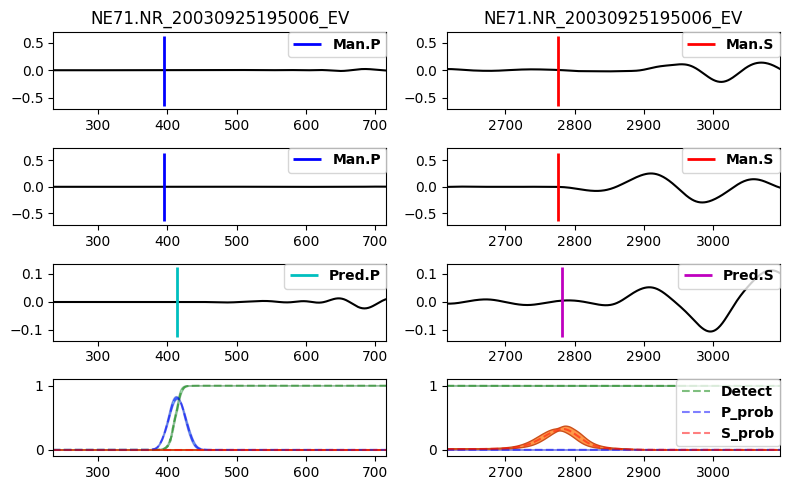

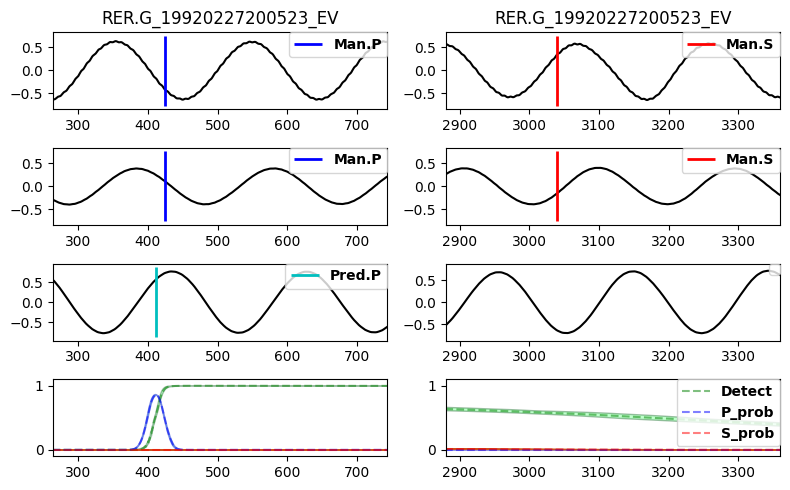

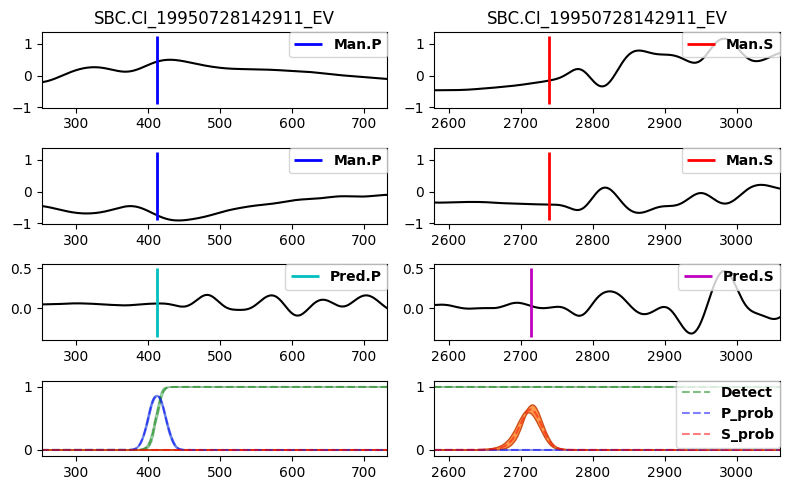

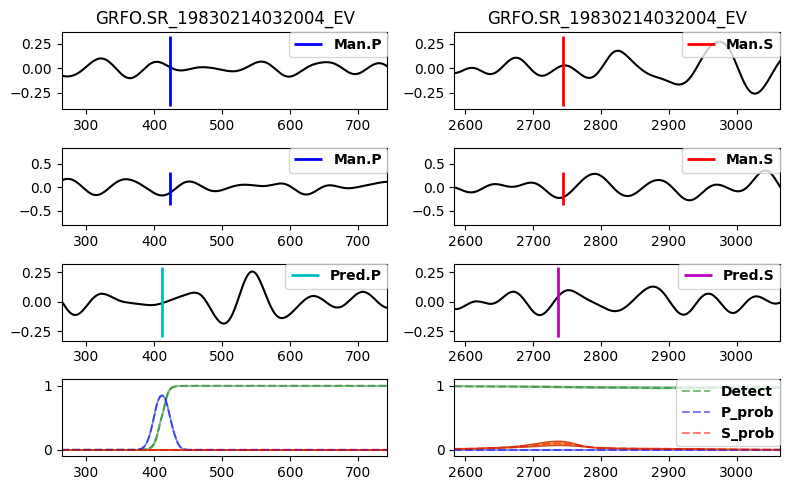

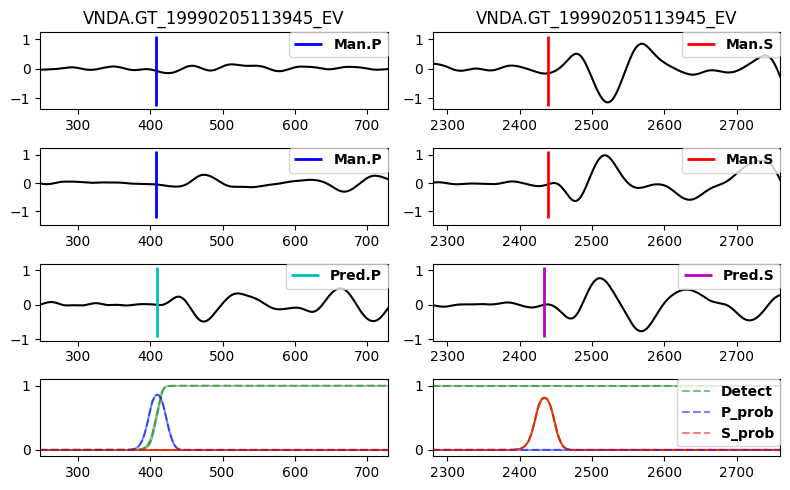

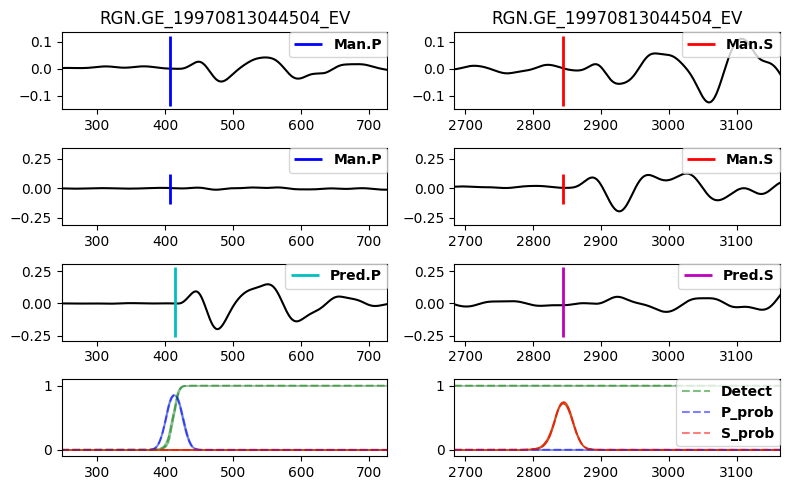

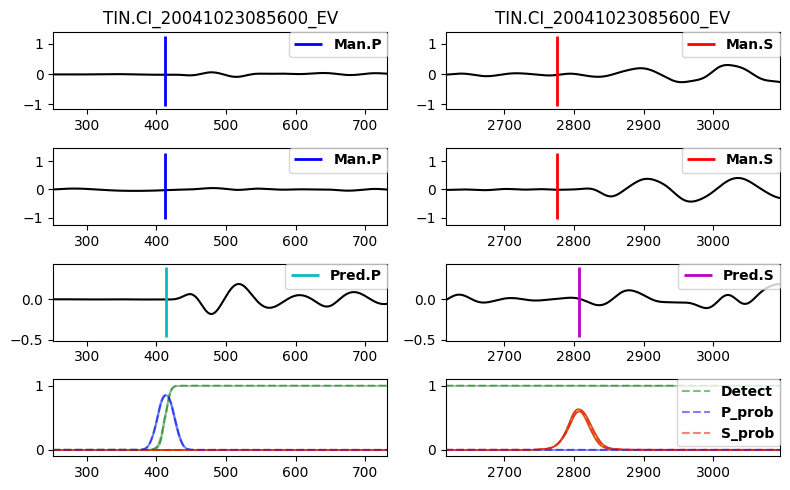

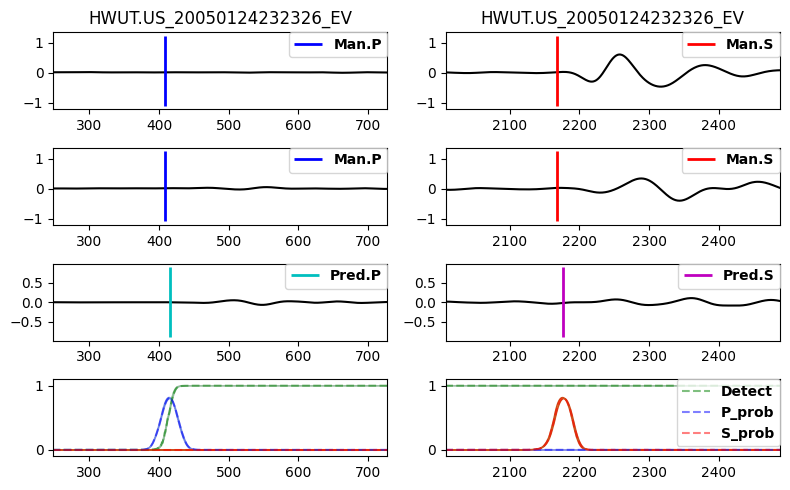

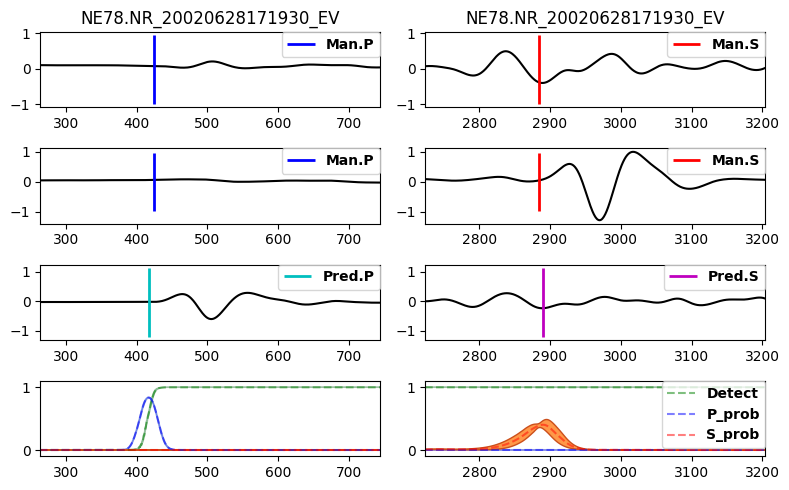

In [7]:
from EQTransformer.core.tester8 import tester
# test.hdf5', input_csv='training_PandS.csv'
# tester(input_hdf5='test.hdf5', input_testset='test_trainer_outputs/test.npy', input_model='test_trainer_outputs/models/test_trainer_005.h5', output_name='test_tester', detection_threshold=0.20, P_threshold=0.1, S_threshold=0.1, number_of_plots=30, estimate_uncertainty=True, number_of_sampling=5, input_dimention=(9000, 3), normalization_mode='std', mode='generator', batch_size=10, gpuid=None, gpu_limit=None)
# tester(input_hdf5='upfil.hdf5', input_testset='test_trainer_upfil_outputs/test.npy', input_model='test_trainer_upfil_outputs/models/test_trainer_upfil_006.h5', output_name='test_tester_upfil', detection_threshold=0.20, P_threshold=0.1, S_threshold=0.1, number_of_plots=30, estimate_uncertainty=True, number_of_sampling=5, input_dimention=(6000, 3), normalization_mode='std', mode='generator', batch_size=10, gpuid=None, gpu_limit=None)
# tester(input_hdf5='upfil.hdf5', input_testset='test_trainer_upfil_outputs/test.npy', input_model='EQTransformer/ModelsAndSampleData/EqT_model.h5', output_name='test_tester_vanilla', detection_threshold=0.20, P_threshold=0.1, S_threshold=0.1, number_of_plots=30, estimate_uncertainty=True, number_of_sampling=5, input_dimention=(6000, 3), normalization_mode='std', mode='generator', batch_size=10, gpuid=None, gpu_limit=None)
tester(input_hdf5='updeANMO.hdf5', input_testset='test_trainer_updeANMO_outputs/test.npy', input_model='test_trainer_updeANMO_outputs/models/test_trainer_updeANMO_005.h5', output_name='test_tester_updeANMO', detection_threshold=0.20, P_threshold=0.1, S_threshold=0.1, number_of_plots=30, estimate_uncertainty=True, number_of_sampling=5, input_dimention=(6000, 3), normalization_mode='std', mode='generator', batch_size=10, gpuid=None, gpu_limit=None)

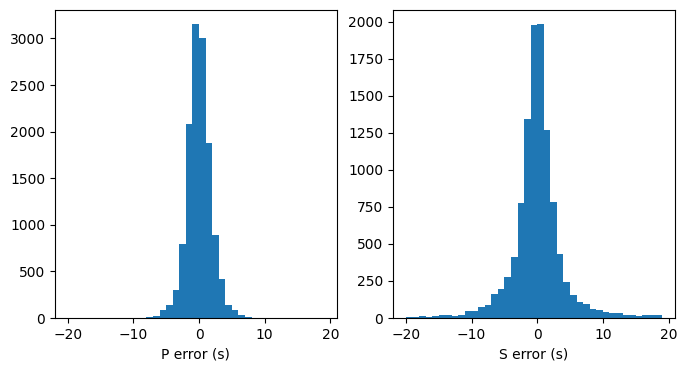

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(121)
# pred = pd.read_csv('test_tester_outputs/X_test_results.csv')
pred = pd.read_csv('test_tester_updeANMO_outputs/X_test_results.csv')
plt.hist(pred['P_error']/4, bins=np.arange(-20,20))
plt.xlabel('P error (s)')
plt.subplot(122)
plt.hist(pred['S_error']/4, bins=np.arange(-20,20))
plt.xlabel('S error (s)')
plt.show()

In [9]:
(pred['P_error'].where(np.abs(pred['P_error']/4)<20)/4).describe()

count    13019.000000
mean        -0.166583
std          1.806915
min        -13.750000
25%         -1.250000
50%         -0.250000
75%          1.000000
max          9.000000
Name: P_error, dtype: float64

In [10]:
(pred['S_error'].where(np.abs(pred['S_error']/4)<20)/4).describe()

count    10858.000000
mean        -0.079941
std          3.809893
min        -19.750000
25%         -1.750000
50%         -0.250000
75%          1.500000
max         19.750000
Name: S_error, dtype: float64

| model | std_P | std_S | mean_P | mean_S |
| ---- | ---- | ---- | ---- | ---- |
| EQtransformer | 2.56s | 4.57s | 2.64s | 3.48s |
| upscaling | 1.97s | 4.91s | - | - |
| upscaling + rotation(partial) | 1.92s | 4.59s | - | - |
| upscaling + ANMO convolution (maybe wrong) | 1.87s | 4.03s | - | - |
| upscaling + bp filter (f=0.03-0.05) | 1.88s | 4.19s | -0.04s | -0.25s |
| upscaling + deconvolution + ANMO (wrong) | 1.65s | 3.06s | -0.18s | -0.10s |
| upscaling + deconvolution + GRFO | 1.66s | 2.53s | -0.10s | -0.83s |


- remove inst response
- close look to the wavelet

In [6]:
import seisbench as sb
import seisbench.data as sbd
data = sbd.DummyDataset()

In [12]:
data.get_waveforms(0)

array([[  34.,   47.,   51., ...,  667.,  695.,  662.],
       [-100.,  -99.,  -98., ..., -229., -208., -201.],
       [ 645.,  636.,  625., ...,  420.,  416.,  374.]])

In [ ]:
import h5py
with h5py.File('/Users/jun/phasepick/test.hdf5','w+') as f:
    

In [4]:
import h5py
f = h5py.File('/Users/jun/phasepick/EQTransformer/ModelsAndSampleData/100samples.hdf5','r')
# print(dir(f['data/109C.TA_20060723155859_EV']))
# print(dir(f))
# dset = f['data/109C.TA_20060723155859_EV']
print(dset[...])
f.close

[[-0.         -0.          0.        ]
 [-0.0085106  -0.03259867  0.00775105]
 [-0.02285321 -0.07897092  0.02457174]
 ...
 [ 0.10581018 -0.12264204 -0.062743  ]
 [ 0.00339233 -0.05204263 -0.01183952]
 [-0.         -0.         -0.        ]]


<bound method File.close of <HDF5 file "100samples.hdf5" (mode r)>>

In [15]:
import pandas as pd
csv = pd.read_csv('/Users/jun/phasepick/EQTransformer/ModelsAndSampleData/100samples.csv')
csv

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.50,17.080000,...,None,None,0.9200,102.09,159.3,[ 56.79999924 55.40000153 47.40000153],[[ 2896.]],2006-07-23 15:59:00.960000,earthquake_local,109C.TA_20060723155859_EV
1,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.50,16.879999,...,None,None,0.9100,101.34,281.7,[ 65. 65.5 61.40000153],[[ 5508.]],2006-11-03 15:56:53.610000,earthquake_local,109C.TA_20061103155652_EV
2,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.50,17.260000,...,None,None,0.9200,101.87,280.5,[ 37.20000076 42. 38.59999847],[[ 3114.]],2006-11-03 16:12:24.700000,earthquake_local,109C.TA_20061103161223_EV
3,TA,109C,BH,32.8889,-117.1051,150.0,900.0,manual,0.50,17.280001,...,None,None,0.9300,103.26,281.6,[ 54.09999847 54.90000153 45.5 ],[[ 3152.]],2006-11-14 13:32:22.540000,earthquake_local,109C.TA_20061114133221_EV
4,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.50,18.139999,...,None,None,0.9200,102.48,4.7,[ 58.20000076 56.20000076 53.79999924],[[ 3134.]],2006-11-27 10:46:41.060000,earthquake_local,109C.TA_20061127104640_EV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.58,4.130000,...,CI,None,0.2089,23.23,240.1,[ 17.39999962 15.80000019 12.80000019],[[ 2392.]],2007-09-16 01:38:21.090000,earthquake_local,109C.TA_20070916013820_EV
96,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.58,8.910000,...,CI,None,0.4792,53.29,28.2,[ 27.29999924 28. 31.89999962],[[ 1766.]],2007-09-18 20:02:18.960000,earthquake_local,109C.TA_20070918200217_EV
97,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.53,15.220000,...,CI,None,0.8566,95.26,21.2,[ 20.39999962 20.89999962 12.80000019],[[ 2310.]],2007-09-29 22:37:10.120000,earthquake_local,109C.TA_20070929223709_EV
98,TA,109C,BH,32.8889,-117.1051,150.0,400.0,manual,0.61,15.120000,...,CI,None,0.8464,94.12,20.1,[ 33.09999847 31.60000038 22.20000076],[[ 2134.]],2007-09-30 01:03:45.690000,earthquake_local,109C.TA_20070930010344_EV


In [51]:
import h5py
f = h5py.File('/Users/jun/phasepick/EQTransformer/ModelsAndSampleData/EqT_model.h5','r')
# list(f.keys())
f['model_weights'].keys()
# f['optimizer_weights'].keys()
# dset = f['data/109C.TA_20060723155859_EV']
# dset[...]

<KeysViewHDF5 ['activation_1', 'activation_10', 'activation_11', 'activation_12', 'activation_13', 'activation_14', 'activation_2', 'activation_3', 'activation_4', 'activation_5', 'activation_6', 'activation_7', 'activation_8', 'activation_9', 'add_1', 'add_10', 'add_11', 'add_2', 'add_3', 'add_4', 'add_5', 'add_6', 'add_7', 'add_8', 'add_9', 'attentionD', 'attentionD0', 'attentionP', 'attentionS', 'batch_normalization_1', 'batch_normalization_10', 'batch_normalization_11', 'batch_normalization_12', 'batch_normalization_13', 'batch_normalization_14', 'batch_normalization_15', 'batch_normalization_16', 'batch_normalization_17', 'batch_normalization_2', 'batch_normalization_3', 'batch_normalization_4', 'batch_normalization_5', 'batch_normalization_6', 'batch_normalization_7', 'batch_normalization_8', 'batch_normalization_9', 'bidirectional_1', 'bidirectional_2', 'bidirectional_3', 'conv1d_1', 'conv1d_10', 'conv1d_11', 'conv1d_12', 'conv1d_13', 'conv1d_14', 'conv1d_15', 'conv1d_16', 'conv

In [26]:
class Test():
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def _getx(self):
        return self.x
    def _xaddy(self):
        x = self._getx()
        # x += self.y
        x.__add__(self.y)
        print(id(x))
        print(id(self.x))
        # x = .__add__(self.y)
        return self.x

testaa = Test(5,11)._xaddy()
testaa

4425894320
4425894320


5